## Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

!pip install --upgrade scikit-learn==0.20.3 --user

## Load Data

In [2]:
dataset = pd.DataFrame(pd.read_csv('../input/digit-recognizer/train.csv'))
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
len(dataset)

42000

In [4]:
dataset = np.array(dataset, dtype='float64')
x_dataset, y_dataset = dataset[:, 1:], dataset[:, 0, np.newaxis]

train_num = int(0.9 * len(dataset))
x_train, y_train, x_test, y_test = x_dataset[:train_num], y_dataset[:train_num], x_dataset[train_num:], y_dataset[train_num:]

# for binary classifiers
y_train_5 = np.array((y_train == 5), dtype='int32').ravel()
y_test_5 = np.array((y_test == 5), dtype='int32').ravel()

## View Data

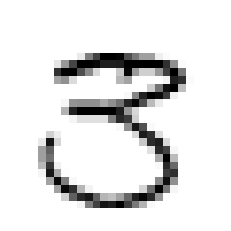

In [5]:
some_digit = x_train[7]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y_train[7]

array([3.])

## Scale Data

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin


# standart_scaler_pipeline = Pipeline([
#     ('standart_scaler', StandardScaler()),
# ])

class NoScaler(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, data):
         return self
        
    def transform(self, data):
        return data
    
    def inverse_transform(self, data):
        return data
    
# scaler = NoScaler() #  do nothing
scaler = StandardScaler() #  set mean=0, std=1
# scaler = MinMaxScaler() #  set values to [0, 1]

x_train_scaler = scaler.fit(x_train)
x_train = x_train_scaler.transform(x_train)
x_test = x_train_scaler.transform(x_test)

y_train_scaler = scaler.fit(y_train)
y_train = y_train_scaler.transform(y_train)
# y_test = y_train_scaler.transform(y_test)

## Calculate metrics

### Plot confusion matrix

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(y_test, y_pred, figsize):
    cf_matrix = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues', ax=ax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    pred_true = np.sum(np.array(cf_matrix).diagonal())
    pred_num = np.sum(cf_matrix)
    accuracy = pred_true / pred_num
    return accuracy

### Print precision & recall

In [9]:
from sklearn.metrics import precision_score, recall_score

def print_precision_recall(y_test, y_pred):
    print(f'Precision {precision_score(y_test, y_pred)}')
    print(f'Recall {recall_score(y_test, y_pred)}')

### Plot ROC curve

In [10]:
from sklearn.metrics import roc_curve


def plot_roc_curve(y_test, y_proba):
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--') #  dashed diagonal
    plt.grid()
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate (recall)')
    plt.show()

# Regressions

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = lin_reg.predict(x_test)
y_pred = y_pred.clip(*y_train_scaler.transform([[0.0], [9.0]])) #  set values to [0, 9]
y_pred = y_train_scaler.inverse_transform(y_pred) #  get unscaled
y_pred = np.round(y_pred)

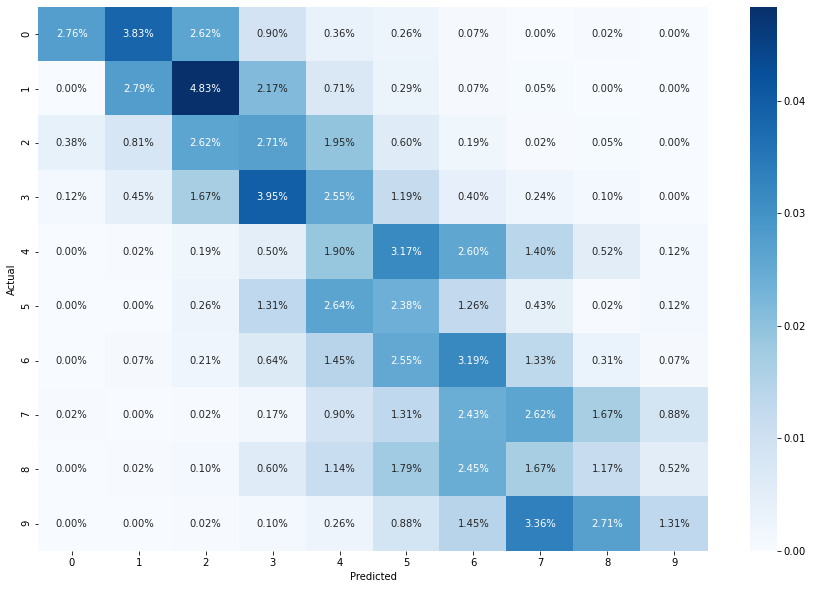

In [13]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [14]:
print(f'Accuracy {accuracy}')

Accuracy 0.2469047619047619


## Polynomial Regression

> **not enough memory**

> **too long runtime**

In [15]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.pipeline import make_pipeline


# def PolynomialRegression(degree=2, **kwargs):
#     return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

# param_grid = {'polynomialfeatures__degree': np.arange(2, 4)}
# grid_search = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')

# grid_search.fit(x_train, y_train)
# grid_search.best_params_

# Binary Classifiers (predict if digit is 5)

## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression(max_iter=1000, solver='lbfgs')
log_reg.fit(x_train, y_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_proba_5 = log_reg.predict_proba(x_test)
y_pred_5 = np.argmax(y_proba_5, axis=-1)

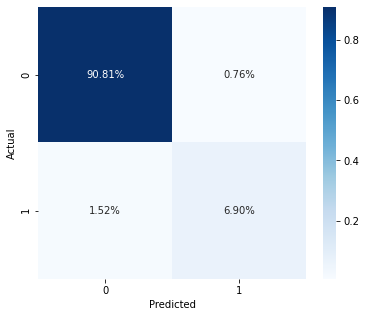

0.9771428571428571

In [19]:
plot_confusion_matrix(y_test_5, y_pred_5, figsize=(6, 5))

In [20]:
print_precision_recall(y_test_5, y_pred_5)

Precision 0.9006211180124224
Recall 0.8192090395480226


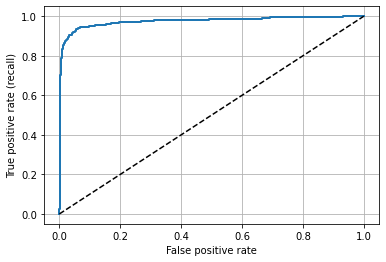

In [21]:
plot_roc_curve(y_test_5, y_proba_5[:, 1])

## Support Vector Machines

> **important: use StandartScaler**

### Grid search

> **use it to find best hyperparameters for your dataset**

> **example code:**

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {'kernel': ['poly'],
              'C': np.linspace(0.1, 0.5, 5),
              'degree': np.arange(3, 5),
              'coef0': np.linspace(1, 5, 5),
              'gamma': ['scale']
             }
grid_search = GridSearchCV(SVC(), param_grid, cv=10, scoring='neg_mean_squared_error')

grid_search.fit(x_train[:1000], y_train_5[:1000]) #  long runtime: try on dataset part
grid_search.best_params_

{'C': 0.1, 'coef0': 3.0, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}

### Linear SVM

In [23]:
from sklearn.svm import LinearSVC


lin_svm_clf = LinearSVC(C=0.03, loss='hinge', max_iter=30000)
lin_svm_clf.fit(x_train, y_train_5)

LinearSVC(C=0.03, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=30000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [24]:
y_pred_5 = lin_svm_clf.predict(x_test)

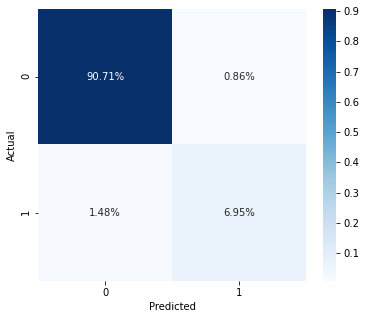

0.9766666666666667

In [25]:
plot_confusion_matrix(y_test_5, y_pred_5, figsize=(6, 5))

In [26]:
print_precision_recall(y_test_5, y_pred_5)

Precision 0.8902439024390244
Recall 0.8248587570621468


### Nonlinear SVM (Polynomial)

In [27]:
poly_svm_clf = SVC(kernel='poly', C=0.1, degree=4, coef0=3.0, gamma='scale')
poly_svm_clf.fit(x_train, y_train_5)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=3.0,
  decision_function_shape='ovr', degree=4, gamma='scale', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
y_pred_5 = poly_svm_clf.predict(x_test)

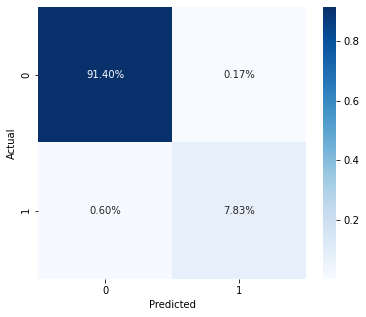

0.9923809523809524

In [29]:
plot_confusion_matrix(y_test_5, y_pred_5, figsize=(6, 5))

In [30]:
print_precision_recall(y_test_5, y_pred_5)

Precision 0.9791666666666666
Recall 0.9293785310734464


### Nonlinear SVM (Gaussian RBF)

In [31]:
rbf_svm_clf = SVC(kernel='rbf', C=1e-09, gamma=1e-09)
rbf_svm_clf.fit(x_train, y_train_5)

SVC(C=1e-09, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-09, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
y_pred_5 = poly_svm_clf.predict(x_test)

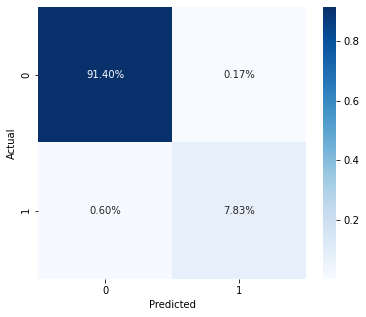

0.9923809523809524

In [33]:
plot_confusion_matrix(y_test_5, y_pred_5, figsize=(6, 5))

In [34]:
print_precision_recall(y_test_5, y_pred_5)

Precision 0.9791666666666666
Recall 0.9293785310734464


# Multi Class Classifiers

In [35]:
y_train = y_train_scaler.inverse_transform(y_train)
y_train = np.round(y_train)

## Decision Tree

> **scaling data is not required**

> **max depth $\approx \log_2 m$, where $m =$ number of features $ = 28 \cdot 28 $**  

In [36]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(max_depth=15, 
                                  min_samples_split=4, 
                                  min_samples_leaf=3) #  find hyperparameters using grid search
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
# Get the pydotplus package for visualizing decision trees
!pip install pydotplus

import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

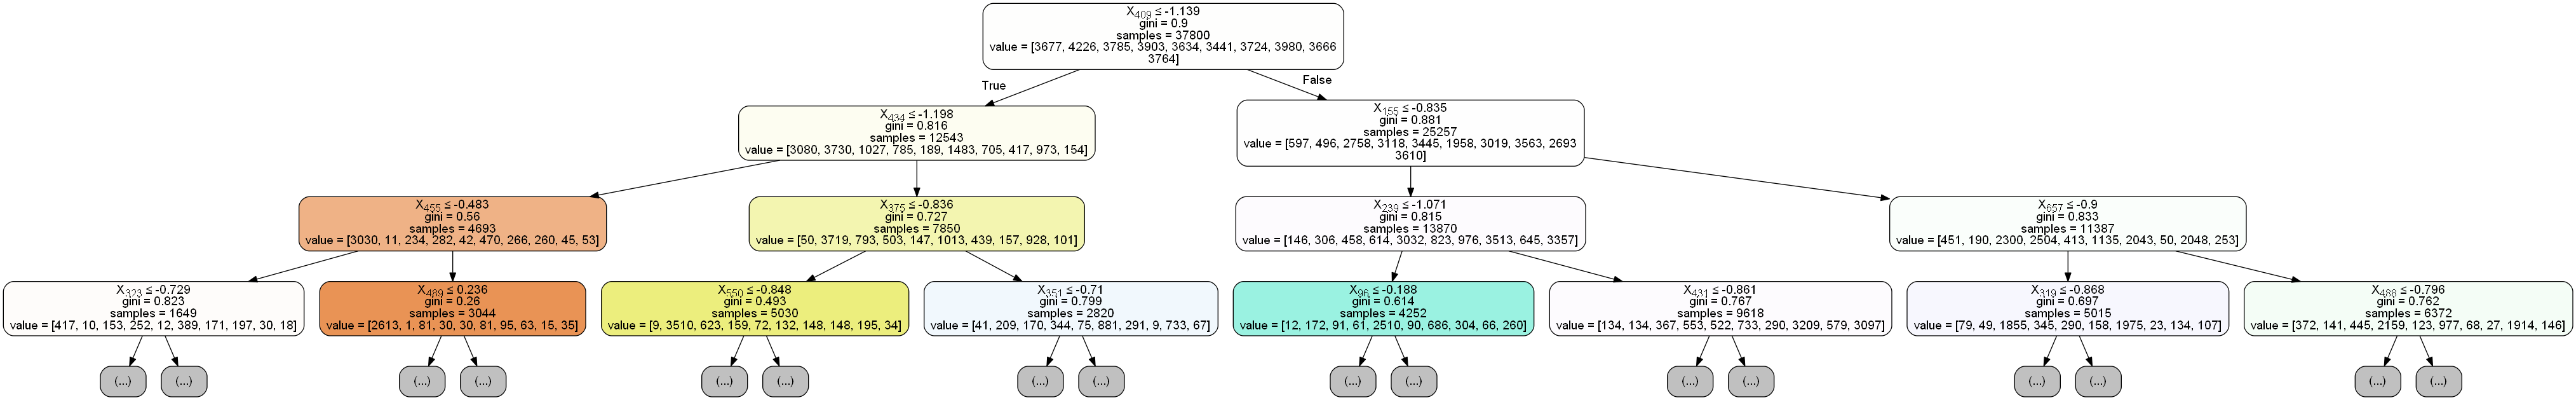

In [38]:
from IPython.display import Image 
from sklearn.externals.six import StringIO
# from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus


# Convert Decision Tree to visualization
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

# Create PNG file
Image(graph.create_png())

In [39]:
y_proba = tree_clf.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=-1)

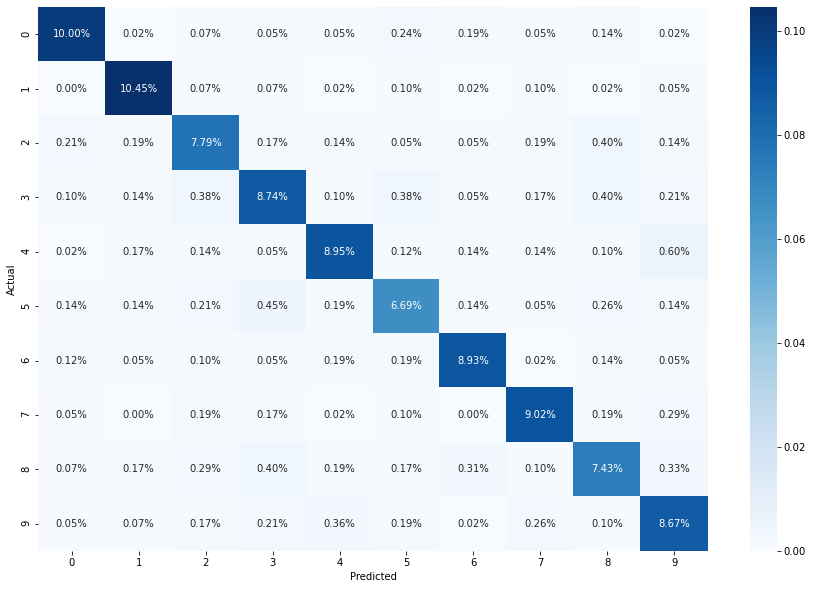

In [40]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [41]:
print(f'Accuracy {accuracy}')

Accuracy 0.8666666666666667


## k-Nearest Neighbors

> **scaling data is preferred**

In [79]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(x_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [80]:
y_proba = knn_clf.predict_proba(x_test)
y_pred = np.argmax(y_proba, axis=-1)

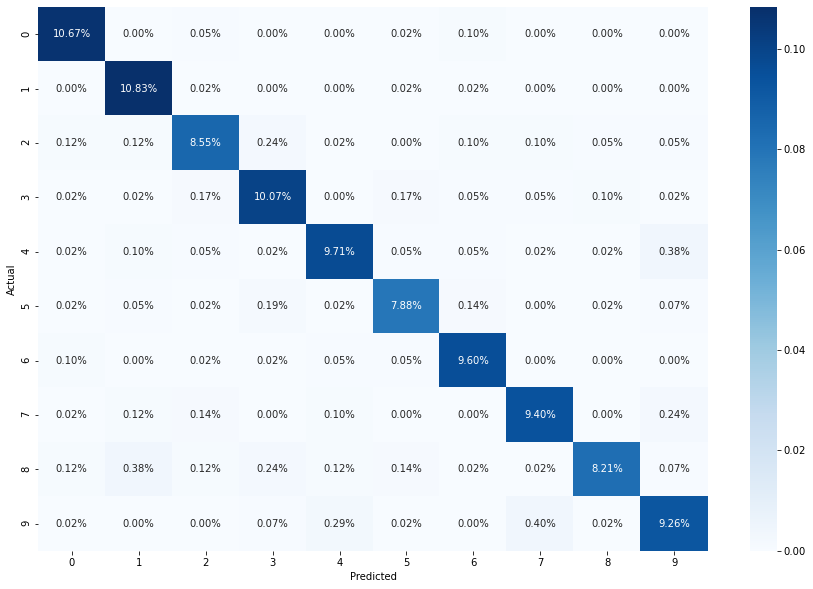

In [81]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [82]:
print(f'Accuracy {accuracy}')

Accuracy 0.9419047619047619


## Naive Bayes

In [114]:
from sklearn.naive_bayes import *

* **Gaussian Naive Bayes**

In [117]:
gnb_clf = GaussianNB()
gnb_clf.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [118]:
y_pred = gnb_clf.predict(x_test)

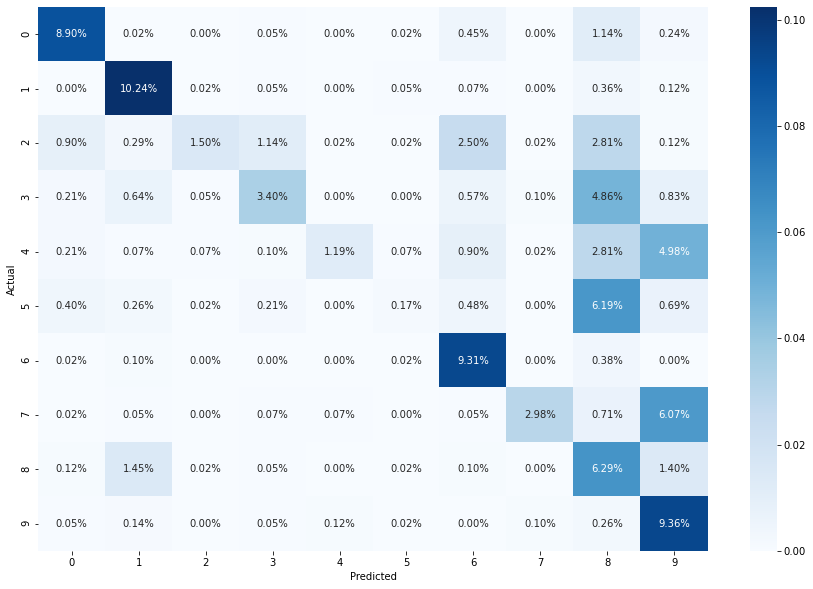

In [119]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [120]:
print(f'Accuracy {accuracy}')

Accuracy 0.5333333333333333


* **Multinomial Naive Bayes**

In [121]:
mnb_clf = MultinomialNB()
mnb_clf.fit(x_train_scaler.inverse_transform(x_train), y_train.ravel()) #  X values must be positive

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [122]:
y_pred = mnb_clf.predict(x_train_scaler.inverse_transform(x_test))

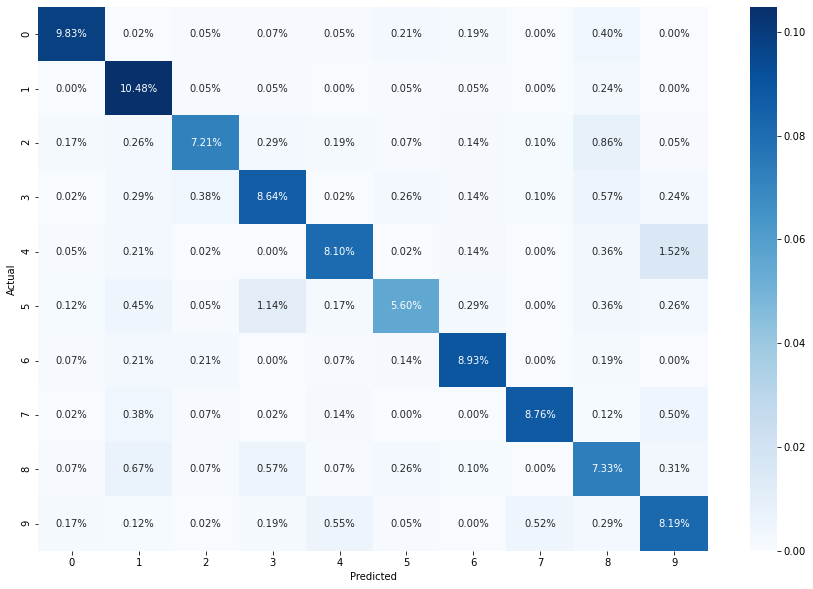

In [123]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [124]:
print(f'Accuracy {accuracy}')

Accuracy 0.8307142857142857


* **Bernoulli Naive Bayes**

In [129]:
bnb_clf = BernoulliNB()
bnb_clf.fit(x_train, y_train.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [130]:
y_pred = bnb_clf.predict(x_test)

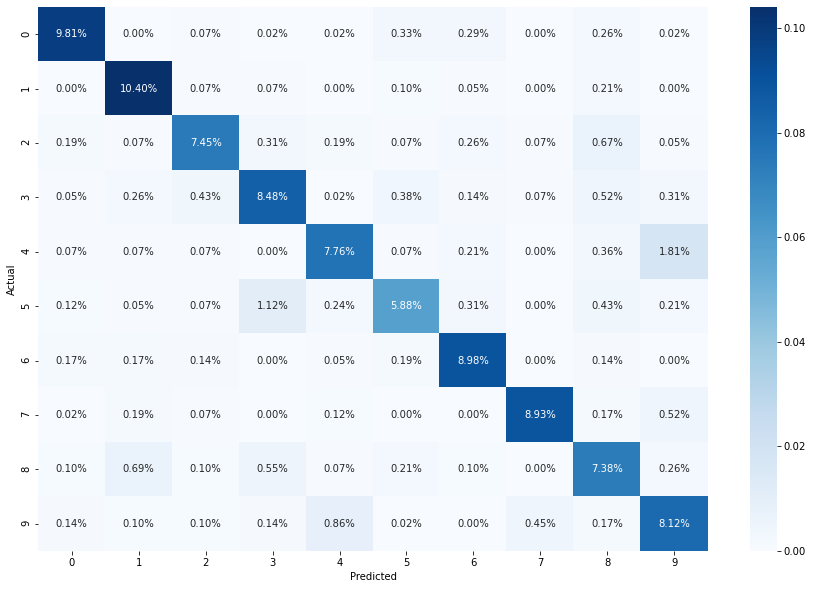

In [131]:
accuracy = plot_confusion_matrix(y_test, y_pred, figsize=(15, 10))

In [132]:
print(f'Accuracy {accuracy}')

Accuracy 0.8319047619047619
